In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data=pd.read_csv('/content/data (2).csv',encoding='latin1')

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

#Data Cleaning and Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [10]:
df.duplicated().sum()

np.int64(5225)

In [11]:
df=df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(401604, 8)

In [14]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [15]:
df[df['Country'] == 'Unspecified'].count()


,0
InvoiceNo,241
StockCode,241
Description,241
Quantity,241
InvoiceDate,241
UnitPrice,241
CustomerID,241
Country,241


In [16]:
df = df[df['Country'] != 'Unspecified']

In [17]:
df.shape

(401363, 8)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [19]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12-01-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12-01-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12-01-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12-01-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12-09-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12-09-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12-09-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12-09-2011 11:58,1.25,17315.0,United Kingdom


In [20]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [21]:
df=df[df['Quantity']>0]

In [22]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
df.shape

(392491, 8)

In [24]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3665


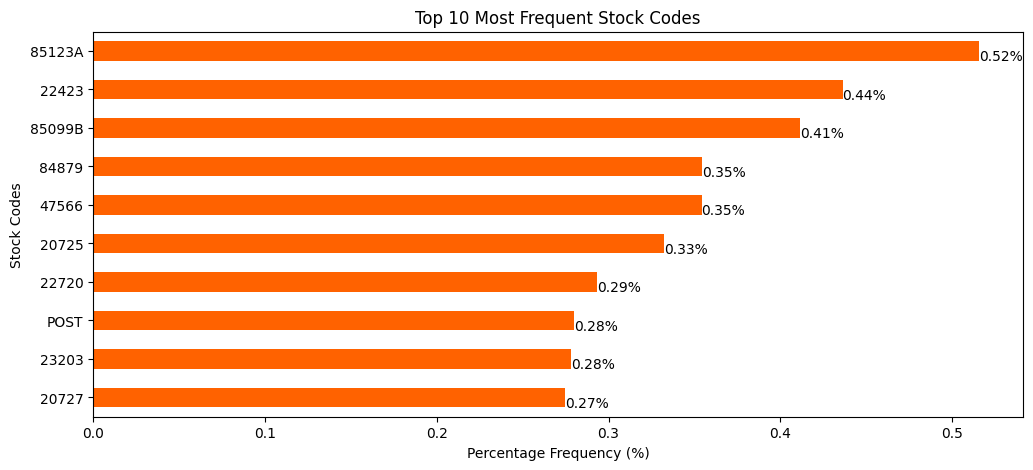

In [25]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [26]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3659
0       5
1       1
Name: count, dtype: int64


In [27]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
C2
M
BANK CHARGES
PADS
DOT


In [28]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.39%


In [29]:
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [30]:
df.shape

(390942, 8)

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [32]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed', dayfirst=False, errors='coerce')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390942 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    390942 non-null  object        
 1   StockCode    390942 non-null  object        
 2   Description  390942 non-null  object        
 3   Quantity     390942 non-null  int64         
 4   InvoiceDate  390942 non-null  datetime64[ns]
 5   UnitPrice    390942 non-null  float64       
 6   CustomerID   390942 non-null  float64       
 7   Country      390942 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.8+ MB


In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [35]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [36]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [37]:
df['CustomerID'].value_counts()

,count
CustomerID,
17841.0,7667
14911.0,5586
14096.0,5095
12748.0,4397
14606.0,2674
...,...
17956.0,1
15562.0,1
13017.0,1


#Feature Engineering and EDA

In [38]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [39]:
df['Total_Price']=df['Quantity']*df['UnitPrice']

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


<Axes: title={'center': 'Top 10 Revenue Generating Countries'}, xlabel='Country'>

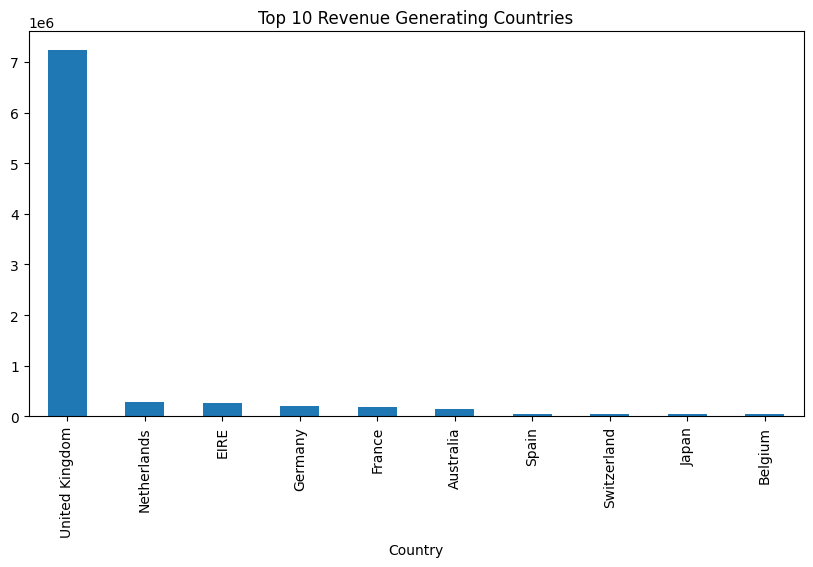

In [41]:
df.groupby("Country")["Total_Price"].sum().sort_values(ascending=False).head(10).plot(kind='bar', title="Top 10 Revenue Generating Countries", figsize=(10,5))

           Country  Unique_Customers
35  United Kingdom              3917
14         Germany                94
13          France                87
30           Spain                30
3          Belgium                25
32     Switzerland                21
26        Portugal                19
18           Italy                14
12         Finland                12
1          Austria                11


<ipython-input-42-bbb850fcd085>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Unique_Customers", y="Country", data=country_customers.head(10), palette="viridis")


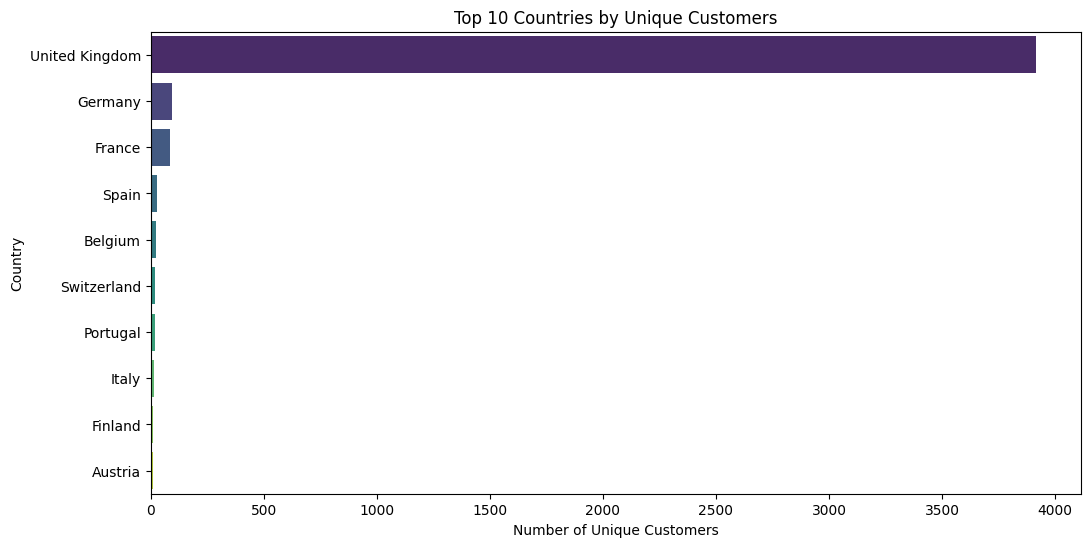

In [42]:
country_customers = df.groupby("Country")["CustomerID"].nunique().reset_index()
country_customers.columns = ["Country", "Unique_Customers"]
country_customers = country_customers.sort_values(by="Unique_Customers", ascending=False)

# Display top 10 countries
print(country_customers.head(10))

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="Unique_Customers", y="Country", data=country_customers.head(10), palette="viridis")
plt.xlabel("Number of Unique Customers")
plt.ylabel("Country")
plt.title("Top 10 Countries by Unique Customers")
plt.show()


Unoted-Kingdoms is most revenue generating country with more no.of customers

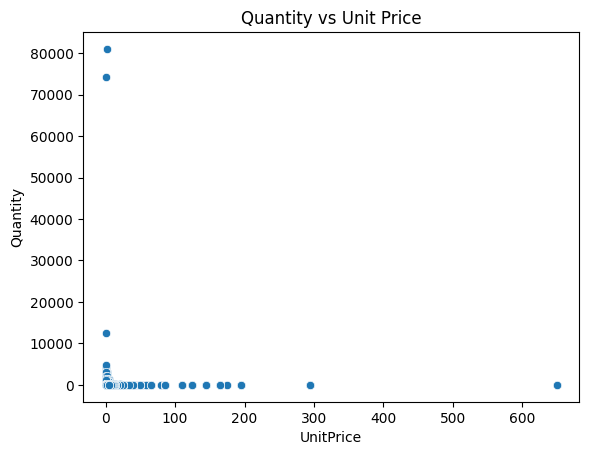

In [43]:
sns.scatterplot(x=df["UnitPrice"], y=df["Quantity"])
plt.title("Quantity vs Unit Price")
plt.show()

In [44]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month'>

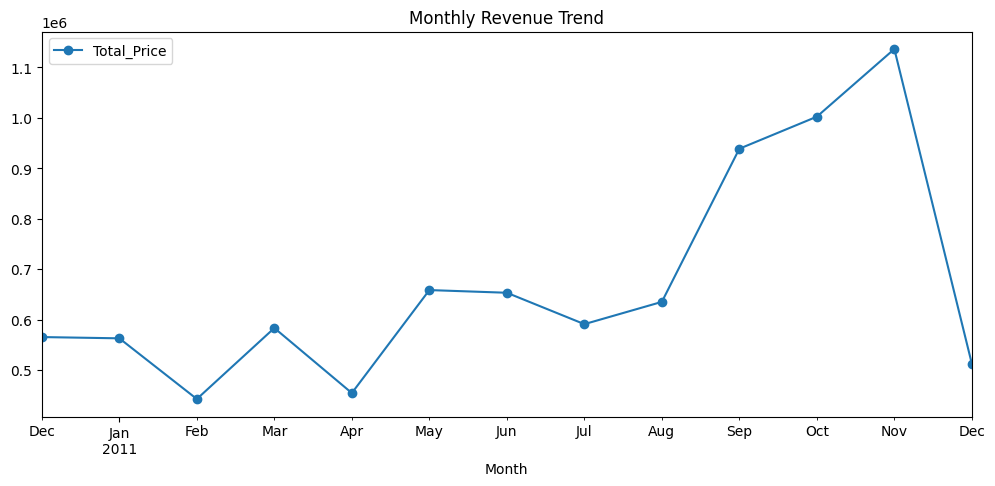

In [45]:
df.groupby("Month").agg({'Total_Price':'sum'}).plot(kind="line", marker="o", figsize=(12,5), title="Monthly Revenue Trend")


Aug to Nov there are more customers buying the products and revenue is maximum in Nov

In [46]:
df['Description'].nunique()

3871

<Axes: title={'center': 'Top 10 Best-Selling Products'}, xlabel='Description'>

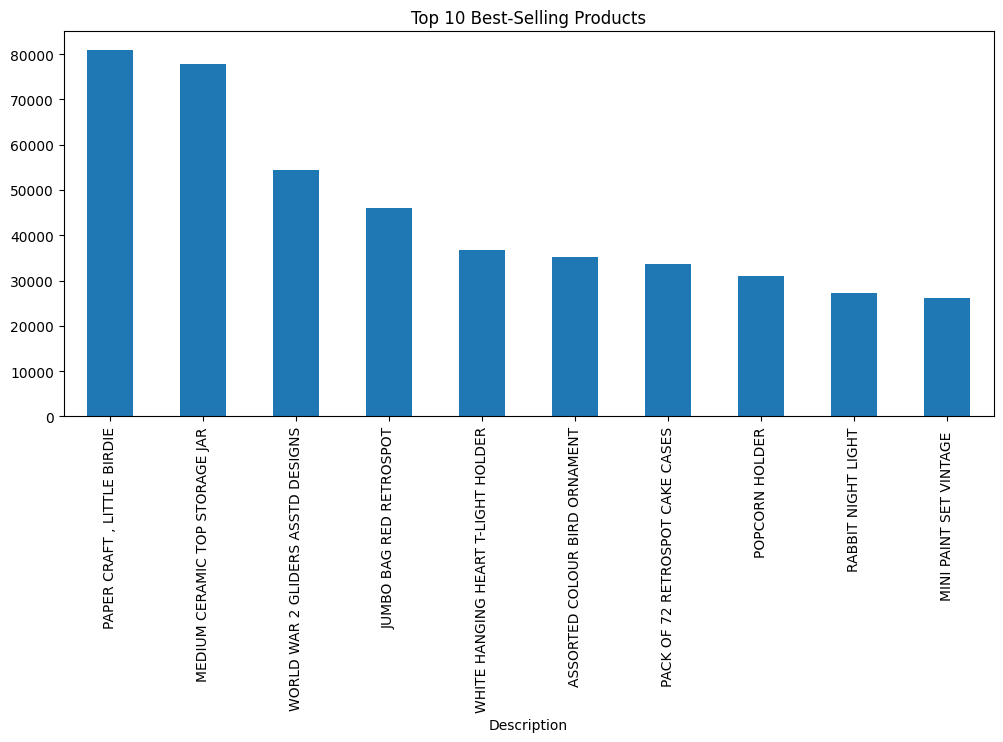

In [47]:
df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10).plot(kind='bar', title="Top 10 Best-Selling Products", figsize=(12,5))


In [48]:
print(f"First Date:{df['InvoiceDate'].min()}, Last Date:{df['InvoiceDate'].max()}")

First Date:2010-12-01 08:26:00, Last Date:2011-12-09 12:50:00


In [49]:
curr_day=df['InvoiceDate'].max()+timedelta(days=1) #it is calculated for calculation of Recency

In [50]:
curr_day

Timestamp('2011-12-10 12:50:00')

In [51]:
#To find Recency,Frequency,Monetary value for each customerId
temp=df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x: (curr_day-x.max()).days,
    'InvoiceNo':"count",
    'Total_Price':"sum"
}).rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total_Price':'Monetary'})

In [53]:
temp.shape

(4331, 3)

In [54]:
temp.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,27,1437.24
12349.0,19,72,1457.55
12350.0,310,16,294.40


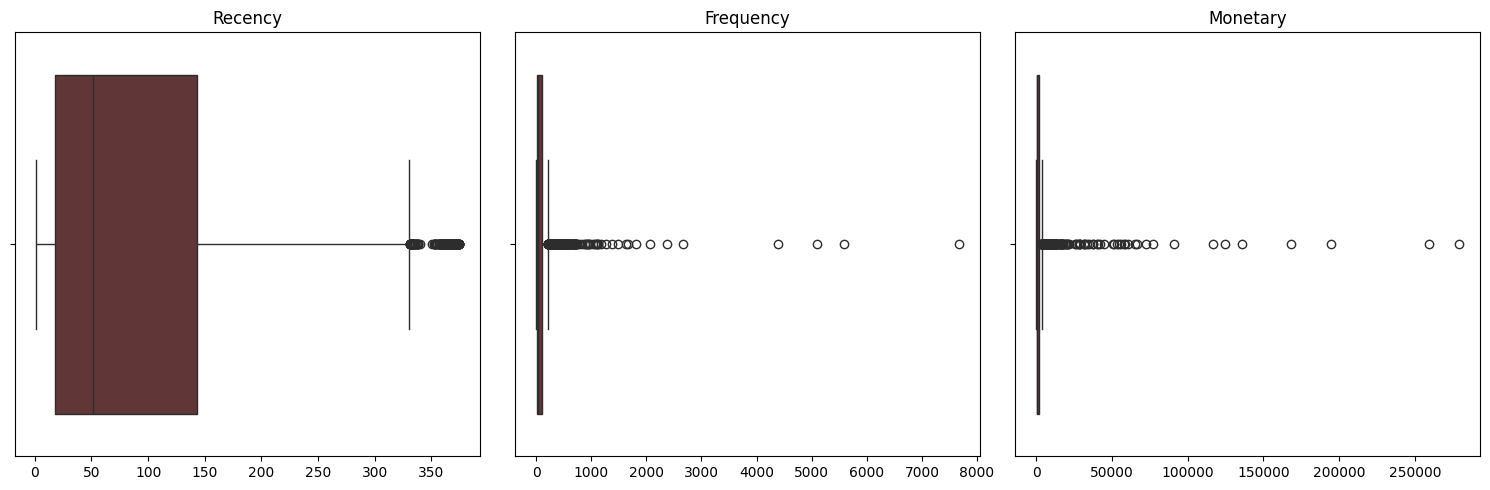

In [55]:
#To check outliers
plt.figure(figsize=(15, 5))  # Set figure size

for i, feature in enumerate(temp, start=1):  # Loop over features in rfm_features
    plt.subplot(1, 3, i)  # Create a subplot (1 row, 3 columns, index i)
    sns.boxplot(x=temp[feature], color="#682F2F")  # Create a box plot
    plt.title(feature)  # Set title as feature name
    plt.xlabel('')  # Remove x-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Show the plots


In [56]:
#Removing outliers
def remove_outlier(tdf,features):
  cleaned_df=tdf.copy()
  for feature in features:
   Q1=cleaned_df[feature].quantile(0.25)
   Q3=cleaned_df[feature].quantile(0.75)
   IQR=Q3-Q1
   lower_bound=Q1-(1.5*IQR)
   upper_bound=Q3+(1.5*IQR)
   cleaned_df=cleaned_df[(cleaned_df[feature]>=lower_bound)&(cleaned_df[feature]<=upper_bound)]
  return cleaned_df
temp_clean=remove_outlier(temp,temp.columns)

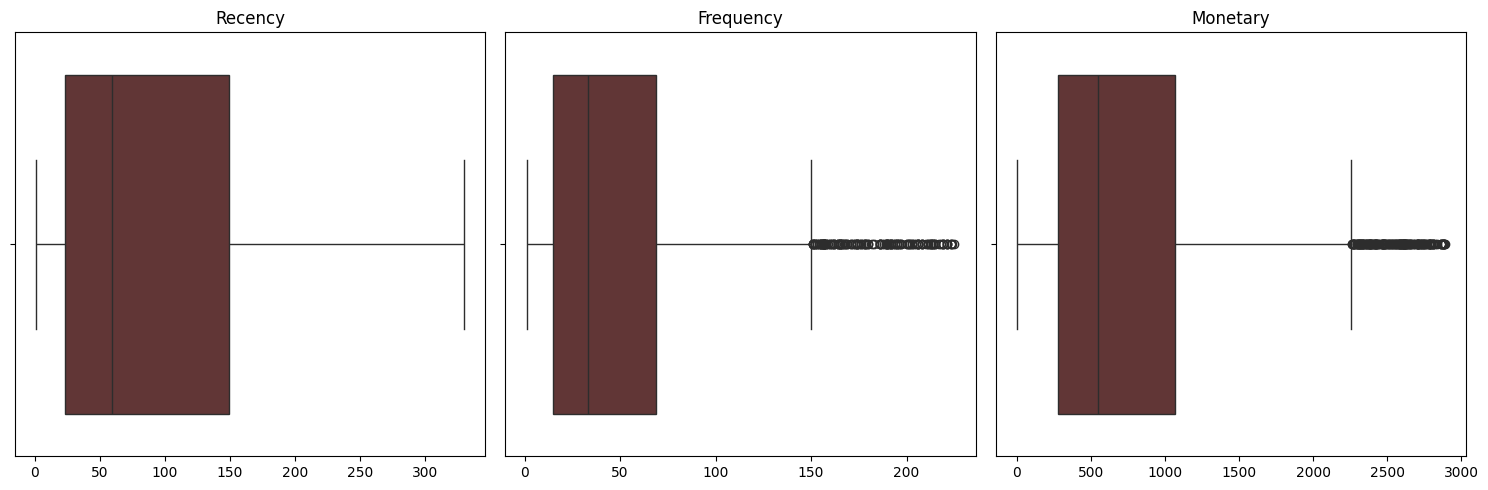

In [57]:
plt.figure(figsize=(15, 5))  # Set figure size

for i, feature in enumerate(temp_clean, start=1):  # Loop over features in rfm_features
    plt.subplot(1, 3, i)  # Create a subplot (1 row, 3 columns, index i)
    sns.boxplot(x=temp_clean[feature], color="#682F2F")  # Create a box plot
    plt.title(feature)  # Set title as feature name
    plt.xlabel('')  # Remove x-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [58]:
temp_clean.head()

,Recency,Frequency,Monetary
CustomerID,,,
12348.0,75,27,1437.24
12349.0,19,72,1457.55
12350.0,310,16,294.40
12352.0,36,77,1385.74
12353.0,204,4,89.00


In [60]:
temp_clean.shape

(3508, 3)

In [61]:
scalar=MinMaxScaler()
X1=scalar.fit_transform(temp_clean)

In [62]:
X1=pd.DataFrame(X1,columns=['Recency','Frequency','Monetary'])

In [63]:
X1.head()

,Recency,Frequency,Monetary
0,0.224924,0.116071,0.497530
1,0.054711,0.316964,0.504561
2,0.939210,0.066964,0.101913
3,0.106383,0.339286,0.479702
4,0.617021,0.013393,0.030809


In [64]:
X1.shape

(3508, 3)

#Clustering Using KMeans

Text(0, 0.5, 'Wcss')

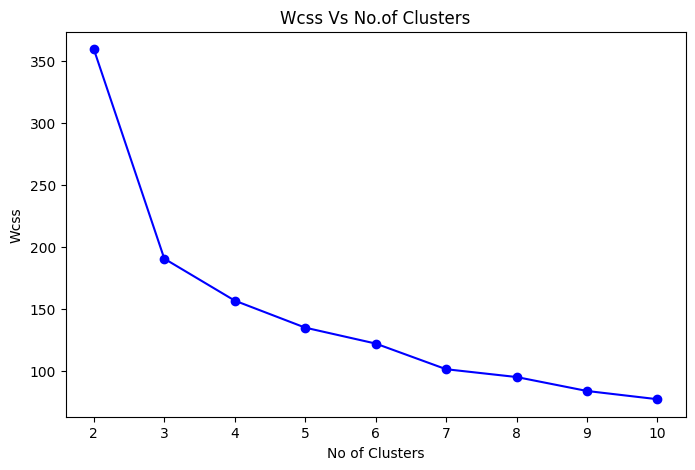

In [65]:
#Find optimal no.of K
wcss=[]
for i in range(2,11):
  km=KMeans(n_clusters=i,random_state=42)
  km.fit_predict(X1)
  wcss.append(km.inertia_)
#plot wcss vs no.of clusters
k=[x for x in range(2,11)]
plt.figure(figsize=(8, 5))
plt.plot(k,wcss, marker='o', linestyle='-', color='b')
plt.title('Wcss Vs No.of Clusters')
plt.xlabel('No of Clusters')
plt.ylabel('Wcss')

In [66]:
#line break down at 3-4 4 is sudden point after  which it is descreasing constantly
km=KMeans(n_clusters=4,random_state=42)
X1['Cluster']=km.fit_predict(X1)

In [67]:
X1.head()

,Recency,Frequency,Monetary,Cluster
0,0.224924,0.116071,0.497530,1
1,0.054711,0.316964,0.504561,1
2,0.939210,0.066964,0.101913,2
3,0.106383,0.339286,0.479702,1
4,0.617021,0.013393,0.030809,2


In [68]:
score = silhouette_score(X1, X1['Cluster'])
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.78


In [69]:

fig = px.scatter_3d(X1,
                     x='Recency',
                     y='Frequency',
                     z='Monetary',
                     color=X1['Cluster'].astype(str),  # Convert cluster to string for color mapping
                     title="3D K-Means Clustering",
                     labels={'Cluster': 'Cluster'},
                     opacity=0.8)

fig.show()

In [70]:
table = X1.groupby('Cluster').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary': 'mean'})
table['Number of user'] = X1['Cluster'].value_counts()
table

,Recency,Frequency,Monetary,Number of user
Cluster,,,,
0,0.157578,0.104682,0.133453,1357
1,0.135575,0.312458,0.381714,841
2,0.702670,0.102196,0.136055,869
3,0.104529,0.572502,0.703100,441


We have grouped the customers into 4 Clusters
* Cluster 0:- Low  value Inactive Customers with more recency value and less frequency,monetary value it indicates they are weak customers who dont buy frequently
* Cluster 1:-These are Normal Customers(Potential Loyal)who have not purchase recently but they are frequent with moderate spending value
* Cluster 2:- Customers with very high recency values means they have not purchsed for very long time and very low frequency and monetary value without spending more.These customers are at high risk to churn
* Cluster 3:- These are Best Customers with very less Recency value and good Frequency and Monetary Value They are buying frequentky with high spend


In [ ]:
# km2=KMeans(n_clusters=3,random_state=42)
# tf1['Cluster']=km2.fit_predict(tf1)

In [ ]:
# score_tf = silhouette_score(tf1, tf1['Cluster'])
# print(f'Silhouette Score: {score_tf:.2f}')

Silhouette Score: 0.76


In [72]:
# fig = px.scatter_3d(tf1,
#                      x='Recency',
#                      y='Frequency',
#                      z='Monetary',
#                      color=tf1['Cluster'].astype(str),  # Convert cluster to string for color mapping
#                      title="3D K-Means Clustering",
#                      labels={'Cluster': 'Cluster'},
#                      opacity=0.8)

# fig.show()

#Hierarchical Clustering (Agglomerative Clustering)

In [73]:
X2=X1.iloc[:,:3]
X2.head()

,Recency,Frequency,Monetary
0,0.224924,0.116071,0.497530
1,0.054711,0.316964,0.504561
2,0.939210,0.066964,0.101913
3,0.106383,0.339286,0.479702
4,0.617021,0.013393,0.030809


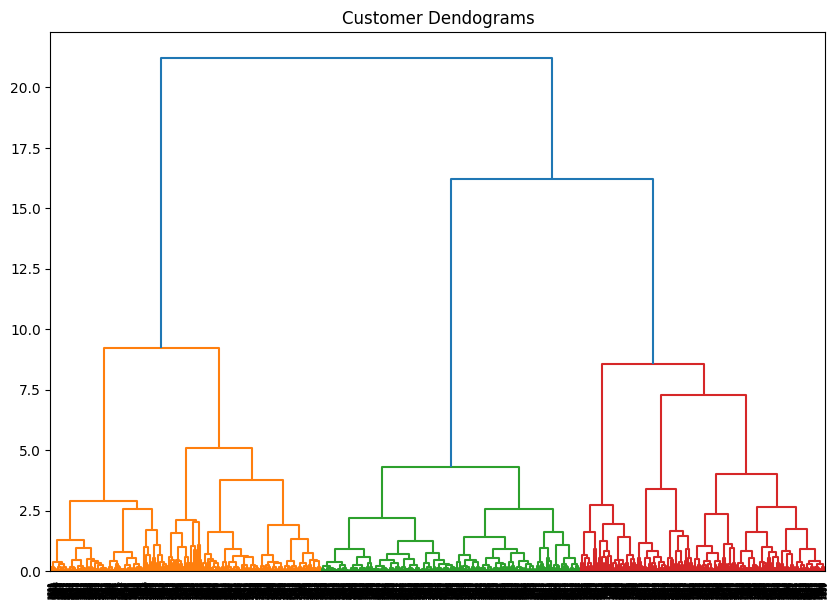

In [74]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(X2,method='ward'))

In [75]:
Agg_cluster=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
labels_=Agg_cluster.fit_predict(X2)

In [76]:
labels_

array([1, 1, 0, ..., 0, 2, 1])

In [77]:
X2['Cluster']=labels_

In [78]:
X2.head()

,Recency,Frequency,Monetary,Cluster
0,0.224924,0.116071,0.497530,1
1,0.054711,0.316964,0.504561,1
2,0.939210,0.066964,0.101913,0
3,0.106383,0.339286,0.479702,1
4,0.617021,0.013393,0.030809,0


In [79]:
score2 = silhouette_score(X2, X2['Cluster'])
print(f'Silhouette Score: {score2:.2f}')

Silhouette Score: 0.74


In [80]:
fig = px.scatter_3d(X2,
                     x='Recency',
                     y='Frequency',
                     z='Monetary',
                     color=X2['Cluster'].astype(str),  # Convert cluster to string for color mapping
                     title="3D K-Means Clustering",
                     labels={'Cluster': 'Cluster'},
                     opacity=0.8)

fig.show()

In [81]:
table2 = X2.groupby('Cluster').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary': 'mean'})
table2['Number of user'] = X2['Cluster'].value_counts()
table2

,Recency,Frequency,Monetary,Number of user
Cluster,,,,
0,0.594980,0.116911,0.160071,1229
1,0.111417,0.413079,0.519095,1108
2,0.110920,0.123601,0.135381,1171


* Cluster 0:- Low value Inactive Customers with more recency value and less frequency,monetary value it indicates they are weak customers who dont buy frequently
* Cluster 1:-These are Best customers purchasing frequently with high value spend
* Cluster 2:- These are Normal Customers(Potential Loyal)who have not purchase recently but they are frequent with moderate spending value


#DBSCAN Clustering

In [82]:
temp.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,27,1437.24
12349.0,19,72,1457.55
12350.0,310,16,294.40


In [83]:
scalar2=StandardScaler()
X3=scalar2.fit_transform(temp)

In [84]:
X3=pd.DataFrame(X3,columns=['Receny','Frequency','Monetary'])

In [85]:
X3.head()

,Receny,Frequency,Monetary
0,2.328909,-0.397118,8.440322
1,-0.904707,0.408098,0.257503
2,-0.176145,-0.281452,-0.065073
3,-0.735041,-0.081260,-0.062792
4,2.169224,-0.330388,-0.193400


In [86]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X3)
X3['Cluster']=clusters

In [87]:
X3.head()

,Receny,Frequency,Monetary,Cluster
0,2.328909,-0.397118,8.440322,-1
1,-0.904707,0.408098,0.257503,0
2,-0.176145,-0.281452,-0.065073,0
3,-0.735041,-0.081260,-0.062792,0
4,2.169224,-0.330388,-0.193400,0


In [88]:
X3['Cluster'].unique()

array([-1,  0,  1])

In [89]:
score3 = silhouette_score(X3, X3['Cluster'])
print(f'Silhouette Score: {score3:.2f}')

Silhouette Score: 0.72


In [90]:
fig = px.scatter_3d(X3,
                     x='Receny',
                     y='Frequency',
                     z='Monetary',
                     color=X3['Cluster'].astype(str),  # Convert cluster to string for color mapping
                     title="3D K-Means Clustering",
                     labels={'Cluster': 'Cluster'},
                     opacity=0.8)

fig.show()

In [91]:
silhouette_scores={
    'K-Means':score,
    'Agglomaretive':score2,
    'DBSCAN':score3
}
score_df=pd.DataFrame(list(silhouette_scores.items()),columns=['Algorithm','Silhouette_score'])


In [92]:
score_df

,Algorithm,Silhouette_score
0,K-Means,0.776255
1,Agglomaretive,0.738618
2,DBSCAN,0.718278


<ipython-input-93-41c8edebc14c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




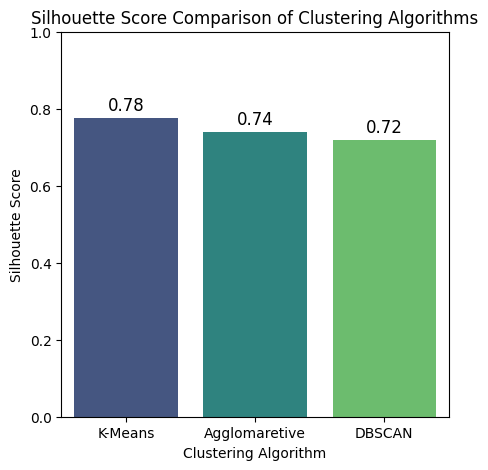

In [93]:
#Camparing 3 clustering Alfogorithm
# Plot the bar chart
plt.figure(figsize=(5, 5))
sns.barplot(x='Algorithm', y='Silhouette_score', data=score_df, palette='viridis')

# Customize the plot
plt.ylim(0, 1)  # Silhouette scores range from -1 to 1
plt.title('Silhouette Score Comparison of Clustering Algorithms')
plt.ylabel('Silhouette Score')
plt.xlabel('Clustering Algorithm')

# Display values on top of bars
for index, value in enumerate(score_df['Silhouette_score']):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=12)

plt.show()



K-Means have highest silhoutte score among all. So we can use results of K-Means Clustering

In [94]:
X1.head()

,Recency,Frequency,Monetary,Cluster
0,0.224924,0.116071,0.497530,1
1,0.054711,0.316964,0.504561,1
2,0.939210,0.066964,0.101913,2
3,0.106383,0.339286,0.479702,1
4,0.617021,0.013393,0.030809,2


#PREDICTION(CASSIFICATION) MODEL

We will use K-Means segmented clusters for predictions,here X1 is df on which we performed K-Means  clustering

In [95]:
X1.shape

(3508, 4)

In [96]:
X1.head()

,Recency,Frequency,Monetary,Cluster
0,0.224924,0.116071,0.497530,1
1,0.054711,0.316964,0.504561,1
2,0.939210,0.066964,0.101913,2
3,0.106383,0.339286,0.479702,1
4,0.617021,0.013393,0.030809,2


In [97]:
X=X1.iloc[:,:3]
y=X1['Cluster']

In [98]:
X.shape

(3508, 3)

In [99]:
y.shape

(3508,)

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [101]:
y_train.value_counts()

,count
Cluster,
0,946
2,615
1,587
3,307


In [102]:
y_test.value_counts()

,count
Cluster,
0,411
1,254
2,254
3,134


In [105]:
rf=RandomForestClassifier(random_state=42)

In [106]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for split
}

In [107]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [108]:
# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.9800407331975561


In [109]:
rf_model=RandomForestClassifier(n_estimators= 100,max_depth= 20, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 10)

In [110]:
model=rf_model.fit(X_train,y_train)

In [111]:
y_pred=model.predict(X_test)

In [112]:
accuracy_rf = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f" Accuracy: {accuracy_rf:.4f}")
print(" Confusion Matrix:\n", conf_matrix)
print(" Classification Report:\n", class_report)

 Accuracy: 0.9782
 Confusion Matrix:
 [[407   4   0   0]
 [  2 247   1   4]
 [  0   0 254   0]
 [  0  10   2 122]]
 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       411
           1       0.95      0.97      0.96       254
           2       0.99      1.00      0.99       254
           3       0.97      0.91      0.94       134

    accuracy                           0.98      1053
   macro avg       0.97      0.97      0.97      1053
weighted avg       0.98      0.98      0.98      1053



In [115]:
 # SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)  # Using RBF Kernel
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [116]:
y_pred=svm_model.predict(X_test)

In [117]:
accuracy_sv= accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f" Accuracy: {accuracy_sv:.4f}")
print(" Confusion Matrix:\n", conf_matrix)
print(" Classification Report:\n", class_report)

 Accuracy: 0.9848
 Confusion Matrix:
 [[410   0   1   0]
 [  2 251   0   1]
 [  1   0 253   0]
 [  0  10   1 123]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       411
           1       0.96      0.99      0.97       254
           2       0.99      1.00      0.99       254
           3       0.99      0.92      0.95       134

    accuracy                           0.98      1053
   macro avg       0.98      0.97      0.98      1053
weighted avg       0.99      0.98      0.98      1053



In [118]:
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(max_iter=500, multi_class='multinomial')

In [119]:
y_pred = log_model.predict(X_test)

In [120]:
accuracy_lg = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f" Accuracy: {accuracy_lg:.4f}")
print(" Confusion Matrix:\n", conf_matrix)
print(" Classification Report:\n", class_report)

 Accuracy: 0.9639
 Confusion Matrix:
 [[405   2   4   0]
 [ 12 241   1   0]
 [  4   0 250   0]
 [  0  14   1 119]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       411
           1       0.94      0.95      0.94       254
           2       0.98      0.98      0.98       254
           3       1.00      0.89      0.94       134

    accuracy                           0.96      1053
   macro avg       0.97      0.95      0.96      1053
weighted avg       0.96      0.96      0.96      1053



In [121]:
print(f'Accuracy of Random Forest : {accuracy_rf:.2f} \nAccuracy of SVC : {accuracy_sv:.2f} \nAccuracy of Logistic Regression : {accuracy_lg:.2f}')

Accuracy of Random Forest : 0.98 
Accuracy of SVC : 0.98 
Accuracy of Logistic Regression : 0.96


In [ ]:
# !pip install gradio

In [ ]:
# import gradio as gr
# import numpy as np

# # Define cluster labels based on business strategy
# cluster_labels = {
#     0: "Weak Customer, May like to Churn",
#     1: "Potential Loyal Customer churn probability is less",
#     2: "High Risk customer, High probability to churn",
#     3: "Best Customer,These are good customers"
# }
# business_strategies = {
#     0: "**Weak Customer**:\n- Offer special discounts\n- Improve customer engagement\n- Personalized email campaigns",
#     1: " **Potential Loyal Customer**:\n- Provide loyalty rewards\n- Exclusive early access to products\n- Encourage referrals",
#     2: " **High Risk to Churn**:\n- Conduct customer feedback surveys\n- Offer limited-time special deals\n- Improve customer support",
#     3: " **Best Customer**:\n- VIP perks and premium benefits\n- Priority customer service\n- Personalized thank-you offers"
# }

# def predict_customer_segment(recency, frequency, monetary):
#     """
#     Predicts the customer cluster based on Recency, Frequency, and Monetary Value.
#     Returns the cluster number and its label.
#     """
#     # Prepare the input as a 2D array
#     input_data = np.array([[recency, frequency, monetary]])
#     input_df=pd.DataFrame(input_data)
#     input_df = scalar.transform(input_df)
#     # Predict the cluster
#     predicted_cluster = model.predict(input_df)[0]

#     # Get the label for the predicted cluster
#     cluster_label = cluster_labels.get(predicted_cluster, "Unknown Cluster")

#     return f"Predicted Cluster: {predicted_cluster} ({cluster_label})"

# def show_business_strategies():
#   strategies = "\n\n".join([f"**Cluster {k}**: {business_strategies[k]}" for k in business_strategies])
#   return strategies

# # # Example usage: Taking user input
# # recency = float(input("Enter Recency (days since last purchase): "))
# # frequency = int(input("Enter Frequency (number of purchases): "))
# # monetary = float(input("Enter Monetary Value (total spent): "))

# # # Predict and display the result
# # cluster_no, label = predict_customer_segment(recency, frequency, monetary)
# # print(f"\nPredicted Cluster: {cluster_no} ({label})")

# # Create the Gradio Interface
# interface = gr.Blocks()

# with interface:
#     gr.Markdown("# Customer Segmentation Prediction")
#     gr.Markdown("Enter Recency, Frequency, and Monetary Value to predict the customer segment.")

#     recency_input = gr.Number(label="Recency (days since last purchase)")
#     frequency_input = gr.Number(label="Frequency (number of purchases)")
#     monetary_input = gr.Number(label="Monetary Value (total spent)")

#     predict_button = gr.Button("Predict Customer Segment")
#     output_text = gr.Textbox(label="Prediction Output")

#     predict_button.click(predict_customer_segment, inputs=[recency_input, frequency_input, monetary_input], outputs=output_text)

#     show_strategy_button = gr.Button("Show Business Strategies")
#     strategy_output = gr.Markdown()

#     show_strategy_button.click(show_business_strategies, outputs=strategy_output)

# # Launch the Gradio app
# interface.launch()

In [122]:
import pickle
# Save model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

In [123]:
with open("scalar.pkl", "wb") as file:
    pickle.dump(scalar, file)

In [124]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [125]:
!wget -q -O - ipv4.icanhazip.com

34.106.140.222


In [126]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.140.222:8501

⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇your url is: https://strong-llamas-work.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: 